In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
from scipy.stats import skew
import re
import csv
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv(
    '20170602_joined_impressions.csv', sep=',', 
    names=['experiment', 'variant', 'userId', 'environmentId', 'frontPageViewId', 'contentPosition',
           'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
           'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
    usecols=['environmentId', 'frontPageViewId', 'contentPosition',
           'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
           'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
    parse_dates=['impressionTimestamp', 'clickTimestamp'])

In [3]:
df

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount
0,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,NaN,2017-06-02 14:05:20,XXak7,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,NaN,2017-06-02 08:11:09,XXak7,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,1.0,2017-06-02 08:11:09,lPrBe,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,1.0,2017-06-02 14:05:20,lPrBe,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,2.0,2017-06-02 14:05:20,BQzXG,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,2.0,2017-06-02 08:11:09,BQzXG,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,3.0,2017-06-02 14:05:20,LraVQ,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,1.0,2017-06-02 12:49:14,OKXpl,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,2.0,2017-06-02 12:49:14,78r94,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,3.0,2017-06-02 12:49:14,rxww0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
content_df=pd.read_csv('201705-20170614_ap_articles.csv', sep=',')

In [5]:
content_df

,id,body,capi-id,categories,content-type,content-type-short,created,hotness,image-url,last-modified,...,paywall-state,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title
0,0Rrg6,Etter helgens Premier League-runde er det fire...,234850,[fotball],news,news,2017-05-01T07:18:03.000Z,40,https://vertical.snd.no/images/38c6a0c9-64c3-4...,2017-05-01T08:56:02.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Den...,2017-05-01T08:30:13.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[manchester city, engelsk fotball, manchester ...",Den tette kampen mellom Guardiola og Klopp kan...
1,0Rr7G,Også denne sesongen har Lionel Messi bøttet in...,234868,[fotball],news,news,2017-05-01T15:16:34.000Z,40,https://vertical.snd.no/images/ba027d24-cee0-4...,2017-05-01T17:26:51.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Bil...,2017-05-01T17:22:22.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[lionel messi, teheran, barcelona, argentina, ...",Bildene av Messis dobbeltgjenger går verden ru...
2,1lrJl,Sarpsborg-Rosenborg 1–2 \n– Det blir den klass...,234881,[fotball],news,news,2017-05-01T19:54:36.000Z,40,https://vertical.snd.no/images/6abc8680-05af-4...,2017-05-01T20:52:37.000Z,...,closed,subscription,http://www.aftenposten.no/100Sport/fotball/-Fo...,2017-05-01T20:52:37.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[eliteserien, sarpsborg 08, rosenborg bk]",– For fem år siden hadde jeg sikkert gravd meg...
3,1lr9e,"Hamas-leder Khaled Meshaal, som bor i eksil i ...",620268,[verden],news,news,2017-05-01T18:38:32.000Z,30,https://ap.mnocdn.no/images/afb62071-4c86-4a1c...,2017-05-01T18:42:25.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Hamas-vil-ikk...,2017-05-01T18:38:32.000Z,http://www.aftenposten.no/article/ap-620268b.html,ap,bench,published,[],Hamas vil ikke lenger kreve at Israel skal uts...
4,0RrOJ,Hoppsjef Clas Brede Bråthen har sagt til NTB a...,234859,[vintersport],news,news,2017-05-01T11:16:31.000Z,30,https://vertical.snd.no/images/259a16bf-c2cd-4...,2017-05-01T11:18:40.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/vintersport...,2017-05-01T11:18:23.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[hopp, holmenkollen, fis]",Skiforbundet vil ikke flytte Kollensøndagen
5,0RWrJ,Siv Jensen tar imot Aftenposten på møterommet ...,620160,"[norge, politikk]",news,news,2017-04-28T16:46:11.000Z,60,https://ap.mnocdn.no/images/edda47a8-6b1d-45c2...,2017-05-01T18:45:07.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/norge/politikk/---De...,2017-05-01T18:30:00.000Z,http://www.aftenposten.no/article/ap-620160b.html,ap,bench,published,"[siv jensen, stortingsvalg 2017, fremskrittspa...",- Det er ganske kjedelig i lengden når hvert ...
6,0Rr8A,Underholdning er ikke mangelvare i den ustabil...,234883,[fotball],news,news,2017-05-01T20:36:45.000Z,30,https://vertical.snd.no/images/8684374e-bde7-4...,2017-05-01T21:06:04.000Z,...,closed,subscription,http://www.aftenposten.no/100Sport/fotball/-Mi...,2017-05-01T21:06:04.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[mushaga bakenga, tore reginiussen, sarpsborg,...",Minner mer og mer om Erik Hamréns RBK
7,1aK7e,– 2016 var året USA og Storbritannia våknet op...,618629,[verden],news,news,2017-04-04T15:36:49.000Z,60,https://ap.mnocdn.no/images/8a59f5df-bd5a-43e6...,2017-05-01T21:07:21.000Z,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Trumps-seier-...,2017-05-01T18:30:00.000Z,http://www.aftenposten.no/article/ap-618629b.html,ap,bench,published,"[marine le pen, donald trump, presidentvalget ...",Trumps seier har ikke løftet protestpartiene i...
8,26oea,Alexander Kristoff (29) klinket till og vant E...,234874,[sykkel],news,news,2017-05-01T16:48:59.000Z,40,https://vertical

In [6]:
content_df.columns = ['contentId','body', 'capi-id', 'categories', 'content-type',
       'content-type-short', 'created', 'hotness', 'image-url',
       'last-modified', 'lead', 'lifetime', 'normalized-hotness',
       'normalized-lifetime', 'paywall-state', 'paywall-type',
       'presentation-url', 'published', 'share-url', 'source-publication',
       'source-system', 'status', 'tags', 'title']

In [7]:
mergedf = df.merge(content_df,on='contentId',how='left')

In [8]:
mergedf

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,...,paywall-state,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title
0,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,NaN,2017-06-02 14:05:20,XXak7,NaN,NaT,NaN,NaN,NaN,...,closed,"metered,subscription",http://www.aftenposten.no/norge/politikk/Nord-...,2017-05-03T08:02:02.000Z,http://www.aftenposten.no/article/ap-620392b.html,ap,bench,published,"[nord-norge, øyvind korsberg, finnmark, troms]",Nord-Norge deles i to
1,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,NaN,2017-06-02 08:11:09,XXak7,NaN,NaT,NaN,NaN,NaN,...,closed,"metered,subscription",http://www.aftenposten.no/norge/politikk/Nord-...,2017-05-03T08:02:02.000Z,http://www.aftenposten.no/article/ap-620392b.html,ap,bench,published,"[nord-norge, øyvind korsberg, finnmark, troms]",Nord-Norge deles i to
2,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,1.0,2017-06-02 08:11:09,lPrBe,NaN,NaT,NaN,NaN,NaN,...,closed,"metered,subscription",http://www.aftenposten.no/norge/Norske-nettban...,2017-05-03T09:56:40.000Z,http://www.aftenposten.no/article/ap-620415b.html,ap,bench,published,[],Norske nettbanker oppe igjen
3,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,1.0,2017-06-02 14:05:20,lPrBe,NaN,NaT,NaN,NaN,NaN,...,closed,"metered,subscription",http://www.aftenposten.no/norge/Norske-nettban...,2017-05-03T09:56:40.000Z,http://www.aftenposten.no/article/ap-620415b.html,ap,bench,published,[],Norske nettbanker oppe igjen
4,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,2.0,2017-06-02 14:05:20,BQzXG,NaN,NaT,NaN,NaN,NaN,...,closed,"metered,subscription",http://www.aftenposten.no/norge/NRK-Utenlandsk...,2017-05-03T06:01:35.000Z,http://www.aftenposten.no/article/ap-620385b.html,ap,bench,published,[helse sør-øst (hsø)],NRK: Utenlandske IT-arbeidere har hatt tilgang...
5,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,2.0,2017-06-02 08:11:09,BQzXG,NaN,NaT,NaN,NaN,NaN,...,closed,"metered,subscription",http://www.aftenposten.no/norge/NRK-Utenlandsk...,2017-05-03T06:01:35.000Z,http://www.aftenposten.no/article/ap-620385b.html,ap,bench,published,[helse sør-øst (hsø)],NRK: Utenlandske IT-arbeidere har hatt tilgang...
6,d8196266-5bc9-462a-b773-4bd6d048c584,NaN,3.0,2017-06-02 14:05:20,LraVQ,NaN,NaT,NaN,NaN,NaN,...,closed,"metered,subscription",http://www.aftenposten.no/norge/Bekymret-oppos...,2017-05-03T08:51:15.000Z,http://www.aftenposten.no/article/ap-620402b.html,ap,bench,published,"[bent høie, it-sikkerhet]",Bekymret opposisjon krever svar om IT-arbeider...
7,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,1.0,2017-06-02 12:49:14,OKXpl,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,2.0,2017-06-02 12:49:14,78r94,NaN,NaT,NaN,NaN,NaN,...,closed,"metered,subscription",http://www.aftenposten.no/okonomi/Stanser-tuse...,2017-06-01T19:30:00.000Z,http://www.aftenposten.no/article/ap-622232b.html,ap,bench,published,"[svindel, nho, netthandel, tollvesenet, virke]",Stanser tusenvis av tollfrie pakker på grunn a...
9,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,3.0,2017-06-02 12:49:14,rxww0,NaN,NaT,NaN,NaN,NaN,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/TV-...,2017-06-02T11:32:55.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[norsk tipping, jesper mathisen, norsk fotball...",TV-ekspertene konkluderte for en måned siden. ...


In [9]:
df=mergedf.dropna(subset=['frontPageViewId'])

In [10]:
df=df.dropna(subset=['contentPosition'])

In [11]:
df=df.dropna(subset=['contentId'])

In [12]:
df.to_csv('MergeContentImpression.csv', sep=',')

In [14]:
df=df.fillna(0)

In [16]:
df

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,...,paywall-state,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title
7,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,1.0,2017-06-02 12:49:14,OKXpl,0,1970-01-01,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,2.0,2017-06-02 12:49:14,78r94,0,1970-01-01,0.0,0,0.0,...,closed,"metered,subscription",http://www.aftenposten.no/okonomi/Stanser-tuse...,2017-06-01T19:30:00.000Z,http://www.aftenposten.no/article/ap-622232b.html,ap,bench,published,"[svindel, nho, netthandel, tollvesenet, virke]",Stanser tusenvis av tollfrie pakker på grunn a...
9,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,3.0,2017-06-02 12:49:14,rxww0,0,1970-01-01,0.0,0,0.0,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/TV-...,2017-06-02T11:32:55.000Z,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[norsk tipping, jesper mathisen, norsk fotball...",TV-ekspertene konkluderte for en måned siden. ...
10,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,4.0,2017-06-02 12:49:14,0Rmd2,0,1970-01-01,0.0,0,0.0,...,closed,"metered,subscription",http://www.aftenposten.no/kultur/NRK-far-full-...,2017-06-02T10:28:30.000Z,http://www.aftenposten.no/article/ap-622405b.html,ap,bench,published,"[kringkastingsrådet, medier, nrk, tv]",NRK får full støtte etter omstridt tiggerdokum...
11,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,5.0,2017-06-02 12:49:22,0RmmA,0,1970-01-01,0.0,0,0.0,...,closed,"metered,subscription",http://www.aftenposten.no/osloby/Oslo-karet-ti...,2017-06-02T12:24:59.000Z,http://www.aftenposten.no/article/ap-622420b.html,ap,bench,published,"[byrådet (oslo), oslo-politikken, klima og miljø]",Oslo kåret til Europas miljøhovedstad av EU
12,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,6.0,2017-06-02 12:49:24,zpmRK,0,1970-01-01,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
13,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,7.0,2017-06-02 12:49:30,6O7Er,0,1970-01-01,0.0,0,0.0,...,closed,subscription,http://www.aftenposten.no/amagasinet/Ingvild-T...,2017-06-01T12:33:17.000Z,http://www.aftenposten.no/article/ap-621395b.html,ap,bench,published,"[ingvild tennfjord, vin]",Ingvild Tennfjord: Klisjeene styrer markedsfør...
14,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,8.0,2017-06-02 12:49:32,x6oGR,0,1970-01-01,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
15,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,9.0,2017-06-02 12:49:40,b0A5v,0,1970-01-01,0.0,0,0.0,...,open,"metered,subscription",http://www.aftenposten.no/meninger/sid/Derfor-...,2017-06-01T19:15:00.000Z,http://www.aftenposten.no/article/ap-622361b.html,ap,bench,published,"[samfunnsdebatt, eksamen, henrik ibsen, skam]",Derfor valgte jeg ikke å sammenligne Nora og N...
16,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,10.0,2017-06-02 12:49:44,zpnr4,0,1970-01-01,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import sklearn 

In [7]:
from sklearn import preprocessing

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
train_samples=df[['contentPosition','IsClicked']].sample(frac=0.1)
train_samples.shape

(608316, 2)

In [19]:
enc = OneHotEncoder()
X=enc.fit_transform(train_samples[['contentPosition']].values)
Y=train_samples[['IsClicked']].values

In [20]:
X.shape

(608316, 127)

In [21]:
Y.shape

(608316, 1)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, Y)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
predicted_probs = lr.predict_proba(X)

In [25]:
predicted_probs 

array([[ 0.9682172 ,  0.0317828 ],
       [ 0.98893373,  0.01106627],
       [ 0.98820634,  0.01179366],
       ..., 
       [ 0.98592398,  0.01407602],
       [ 0.99154483,  0.00845517],
       [ 0.984705  ,  0.015295  ]])

In [26]:
lr.coef_

array([[ 1.51695444,  1.09442608,  1.00229974,  1.11557072,  1.11131206,
         1.07328601,  0.9772834 ,  0.80449973,  0.60881478,  0.60115733,
         0.52238114,  0.55089665,  0.56926006,  0.65808976,  0.52582178,
         0.48706362,  0.52100051,  0.33317495,  0.21396743,  0.40364838,
         0.25401479,  0.27953791,  0.07309035,  0.16141798,  0.04081269,
         0.04939294,  0.02137021, -0.05451285, -0.47159641, -0.01440997,
        -0.06941239, -0.04553178,  0.09966877,  0.24877058,  0.16972448,
         0.10498455, -0.00949849,  0.11411275, -0.06159675,  0.27566674,
        -0.40925548, -0.05808556, -0.07389483,  0.1923623 , -0.16450816,
         0.11515818,  0.04761533, -0.06398629, -0.1306016 , -0.24411472,
         0.01597649, -0.04292662, -0.36686907, -0.1961662 ,  0.26495338,
        -0.47654234, -0.20496686, -0.15466537, -0.00874678, -0.36926472,
        -0.29540651, -0.10773922, -0.7350014 , -0.41728907, -0.20265261,
        -0.22700681,  0.05190908, -0.65813587, -0.8

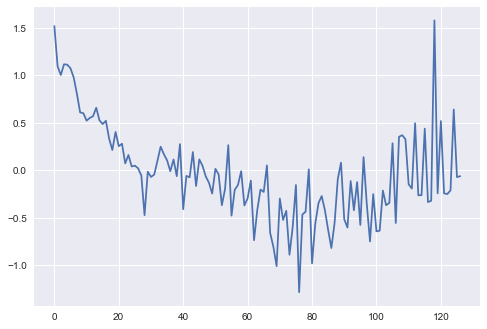

In [29]:
plt.plot(lr.coef_[0])
plt.show()

In [41]:
import numpy as np
from sklearn import metrics
# y = np.array([1, 1, 2, 2])
# pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(Y, predicted_probs[:,1])
metrics.auc(fpr, tpr)


0.65604570385674188

In [ ]:
predicted_probs 

In [37]:
predicted_probs[0]

array([ 0.9682172,  0.0317828])

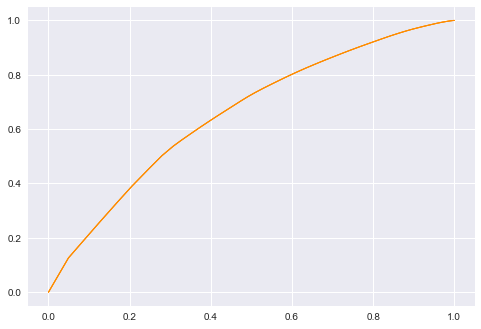

In [44]:
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.show()